In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
filename="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

headers=["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [4]:
df=pd.read_csv(filename,names=headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
df.shape

(205, 26)

Data Wrangling

In [6]:
#checking for duplicate values
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(205, 26)

In [8]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [9]:
# Replacing "?" with np.nan
df.replace("?",np.nan,inplace=True)

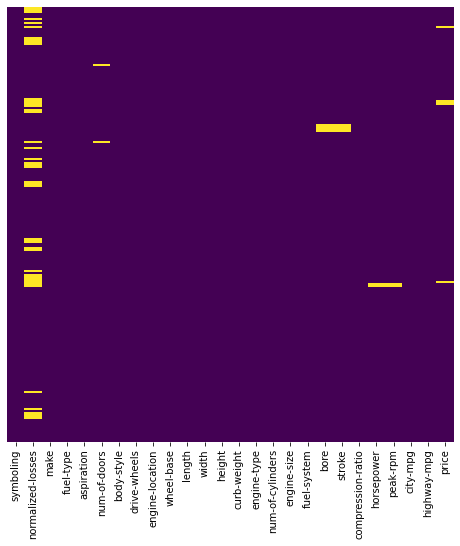

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.show()


In [11]:
df.isnull().apply(pd.value_counts)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
False,205.0,164,205.0,205.0,205.0,203,205.0,205.0,205.0,205.0,...,205.0,205.0,201,201,205.0,203,203,205.0,205.0,201
True,NaN,41,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,...,NaN,NaN,4,4,NaN,2,2,NaN,NaN,4


In [14]:
#Converting the Data Type to float
df[["normalized-losses","bore","stroke","horsepower","peak-rpm","price"]]= df[["normalized-losses","bore","stroke","horsepower","peak-rpm","price"]].astype(float)

In [15]:
df.isnull().apply(pd.value_counts)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
False,205.0,164,205.0,205.0,205.0,203,205.0,205.0,205.0,205.0,...,205.0,205.0,201,201,205.0,203,203,205.0,205.0,201
True,NaN,41,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,...,NaN,NaN,4,4,NaN,2,2,NaN,NaN,4


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

#Addressing Missing Data:

"normalized-Losses","bore","stroke","horsepower","peak-rpm" missing data is filled by median



In [17]:
df["normalized-losses"].replace(np.nan,df["normalized-losses"].median(),inplace=True)
df["bore"].replace(np.nan,df["bore"].median(),inplace=True)
df["stroke"].replace(np.nan,df["stroke"].median(),inplace=True)
df["horsepower"].replace(np.nan,df["horsepower"].median(),inplace=True)
df["peak-rpm"].replace(np.nan,df["peak-rpm"].median(),inplace=True)

In [18]:
#"num-of-doors" filled using value count 
df["num-of-doors"].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [19]:
df["num-of-doors"].replace(np.nan,"four",inplace=True)

In [20]:
#Reverifying the Data
df.isnull().apply(pd.value_counts)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
False,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,...,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,201
True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [21]:
df.dropna(subset=["price"],inplace=True,axis=0)

In [22]:
df.reset_index(drop=True,inplace=True)

In [23]:
df.isnull().apply(pd.value_counts)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
False,201,201,201,201,201,201,201,201,201,201,...,201,201,201,201,201,201,201,201,201,201


In [24]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [25]:
#Normalizing "length", "width" and "height"
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height']=df['height']/df['height'].max()

In [26]:
df[["length","width","height"]]

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027
...,...,...,...
196,0.907256,0.956944,0.928094
197,0.907256,0.955556,0.928094
198,0.907256,0.956944,0.928094
199,0.907256,0.956944,0.928094


In [29]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [30]:
#Binning  of "horsepower", ,it has varible ranging from 48 to 288, transform the continuous variable into discrete categorical 'bins'
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)


,horsepower,horsepower-binned
0,111.0,Low
1,111.0,Low
2,154.0,Medium
3,102.0,Low
4,115.0,Low
5,110.0,Low
6,110.0,Low
7,110.0,Low
8,140.0,Medium
9,101.0,Low


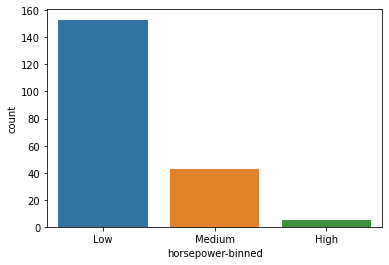

In [31]:
# Distribution of each bin
sns.countplot(df["horsepower-binned"])
plt.show()

In [32]:
#Converting the "fuel-type" into numeric using indicator Variable
df_fuel = pd.get_dummies(df["fuel-type"],drop_first=True)
df_fuel.head()

,gas
0,1
1,1
2,1
3,1
4,1


In [33]:
df_fuel.rename(columns={'gas':"Gas-fuelType"},inplace=True)

In [34]:
df_fuel.head()

,Gas-fuelType
0,1
1,1
2,1
3,1
4,1


In [35]:
df["fuel-type"].value_counts()

gas       181
diesel     20
Name: fuel-type, dtype: int64

In [36]:
df=pd.concat([df,df_fuel],axis=1)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,Gas-fuelType
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,Low,1
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,Low,1
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,Medium,1
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,Low,1
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,Low,1


In [37]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'horsepower-binned', 'Gas-fuelType'],
      dtype='object')

In [38]:
df["Gas-fuelType"].value_counts()

1    181
0     20
Name: Gas-fuelType, dtype: int64

In [39]:
df["aspiration"].value_counts()

std      165
turbo     36
Name: aspiration, dtype: int64

In [41]:
# #Converting the aspiration('turbo' to 1 and 'std' to 0)  into numeric using indicator Variable

df_asp=pd.get_dummies(df["aspiration"],drop_first=True)
df_asp

,turbo
0,0
1,0
2,0
3,0
4,0
...,...
196,0
197,1
198,0
199,1


In [42]:
df_asp.rename(columns={"turbo":"asp-std0-turbo1"},inplace=True)
df_asp.head()

,asp-std0-turbo1
0,0
1,0
2,0
3,0
4,0


In [43]:
df=pd.concat([df,df_asp],axis=1)

In [44]:
df.shape

(201, 29)

In [45]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,Gas-fuelType,asp-std0-turbo1
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,120.711443,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330299,3.257562,10.164279,103.313433,5118.407960,25.179104,30.686567,13207.129353,0.900498,0.179104
std,1.254802,32.111623,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268088,0.316082,4.004965,37.374942,478.183493,6.423220,6.815150,7947.066342,0.300083,0.384397
min,-2.000000,65.000000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000,0.000000
25%,0.000000,101.000000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,1.000000,0.000000
50%,1.000000,115.000000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,1.000000,0.000000
75%,2.000000,137.000000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,1.000000,0.000000
max,3.000000,256.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,1.000000,1.000000


In [46]:
df.describe(include=['object'])

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,2,5,3,2,6,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,181,165,115,94,118,198,145,157,92


In [47]:
# EDA on the Data
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,Gas-fuelType,asp-std0-turbo1
symboling,1.000000,0.457735,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.142547,-0.004387,-0.182196,0.075486,0.279897,-0.035527,0.036233,-0.082391,0.196735,-0.054615
normalized-losses,0.457735,1.000000,-0.075109,-0.009116,0.061799,-0.371830,0.065393,0.073586,-0.052094,0.046024,-0.115967,0.182479,0.245899,-0.193896,-0.150773,0.094366,0.105970,-0.010780
wheel-base,-0.535987,-0.075109,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.494065,0.156740,0.250313,0.372156,-0.360946,-0.470606,-0.543304,0.584642,-0.307237,0.256889
length,-0.365404,-0.009116,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.609557,0.123016,0.159733,0.578683,-0.285301,-0.665192,-0.698142,0.690628,-0.211187,0.230085
width,-0.242423,0.061799,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544986,0.188605,0.189867,0.614146,-0.245273,-0.633531,-0.680635,0.751265,-0.244356,0.305732
height,-0.550160,-0.371830,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.182946,-0.064380,0.259737,-0.086078,-0.310513,-0.049800,-0.104812,0.135486,-0.281578,0.090336
curb-weight,-0.233118,0.065393,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644434,0.166809,0.156433,0.757961,-0.279429,-0.749543,-0.794889,0.834415,-0.221046,0.321955
engine-size,-0.110581,0.073586,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.574504,0.203043,0.028889,0.822167,-0.256503,-0.650546,-0.679571,0.872335,-0.070779,0.110040
bore,-0.142547,-0.052094,0.494065,0.609557,0.544986,0.182946,0.644434,0.574504,1.000000,-0.055539,0.001544,0.565324,-0.269301,-0.580059,-0.589613,0.543158,-0.054944,0.228489
stroke,-0.004387,0.046024,0.156740,0.123016,0.188605,-0.064380,0.166809,0.203043,-0.055539,1.000000,0.187434,0.093555,-0.056336,-0.036823,-0.037100,0.082209,-0.240312,0.217190


<Figure size 1440x1440 with 0 Axes>

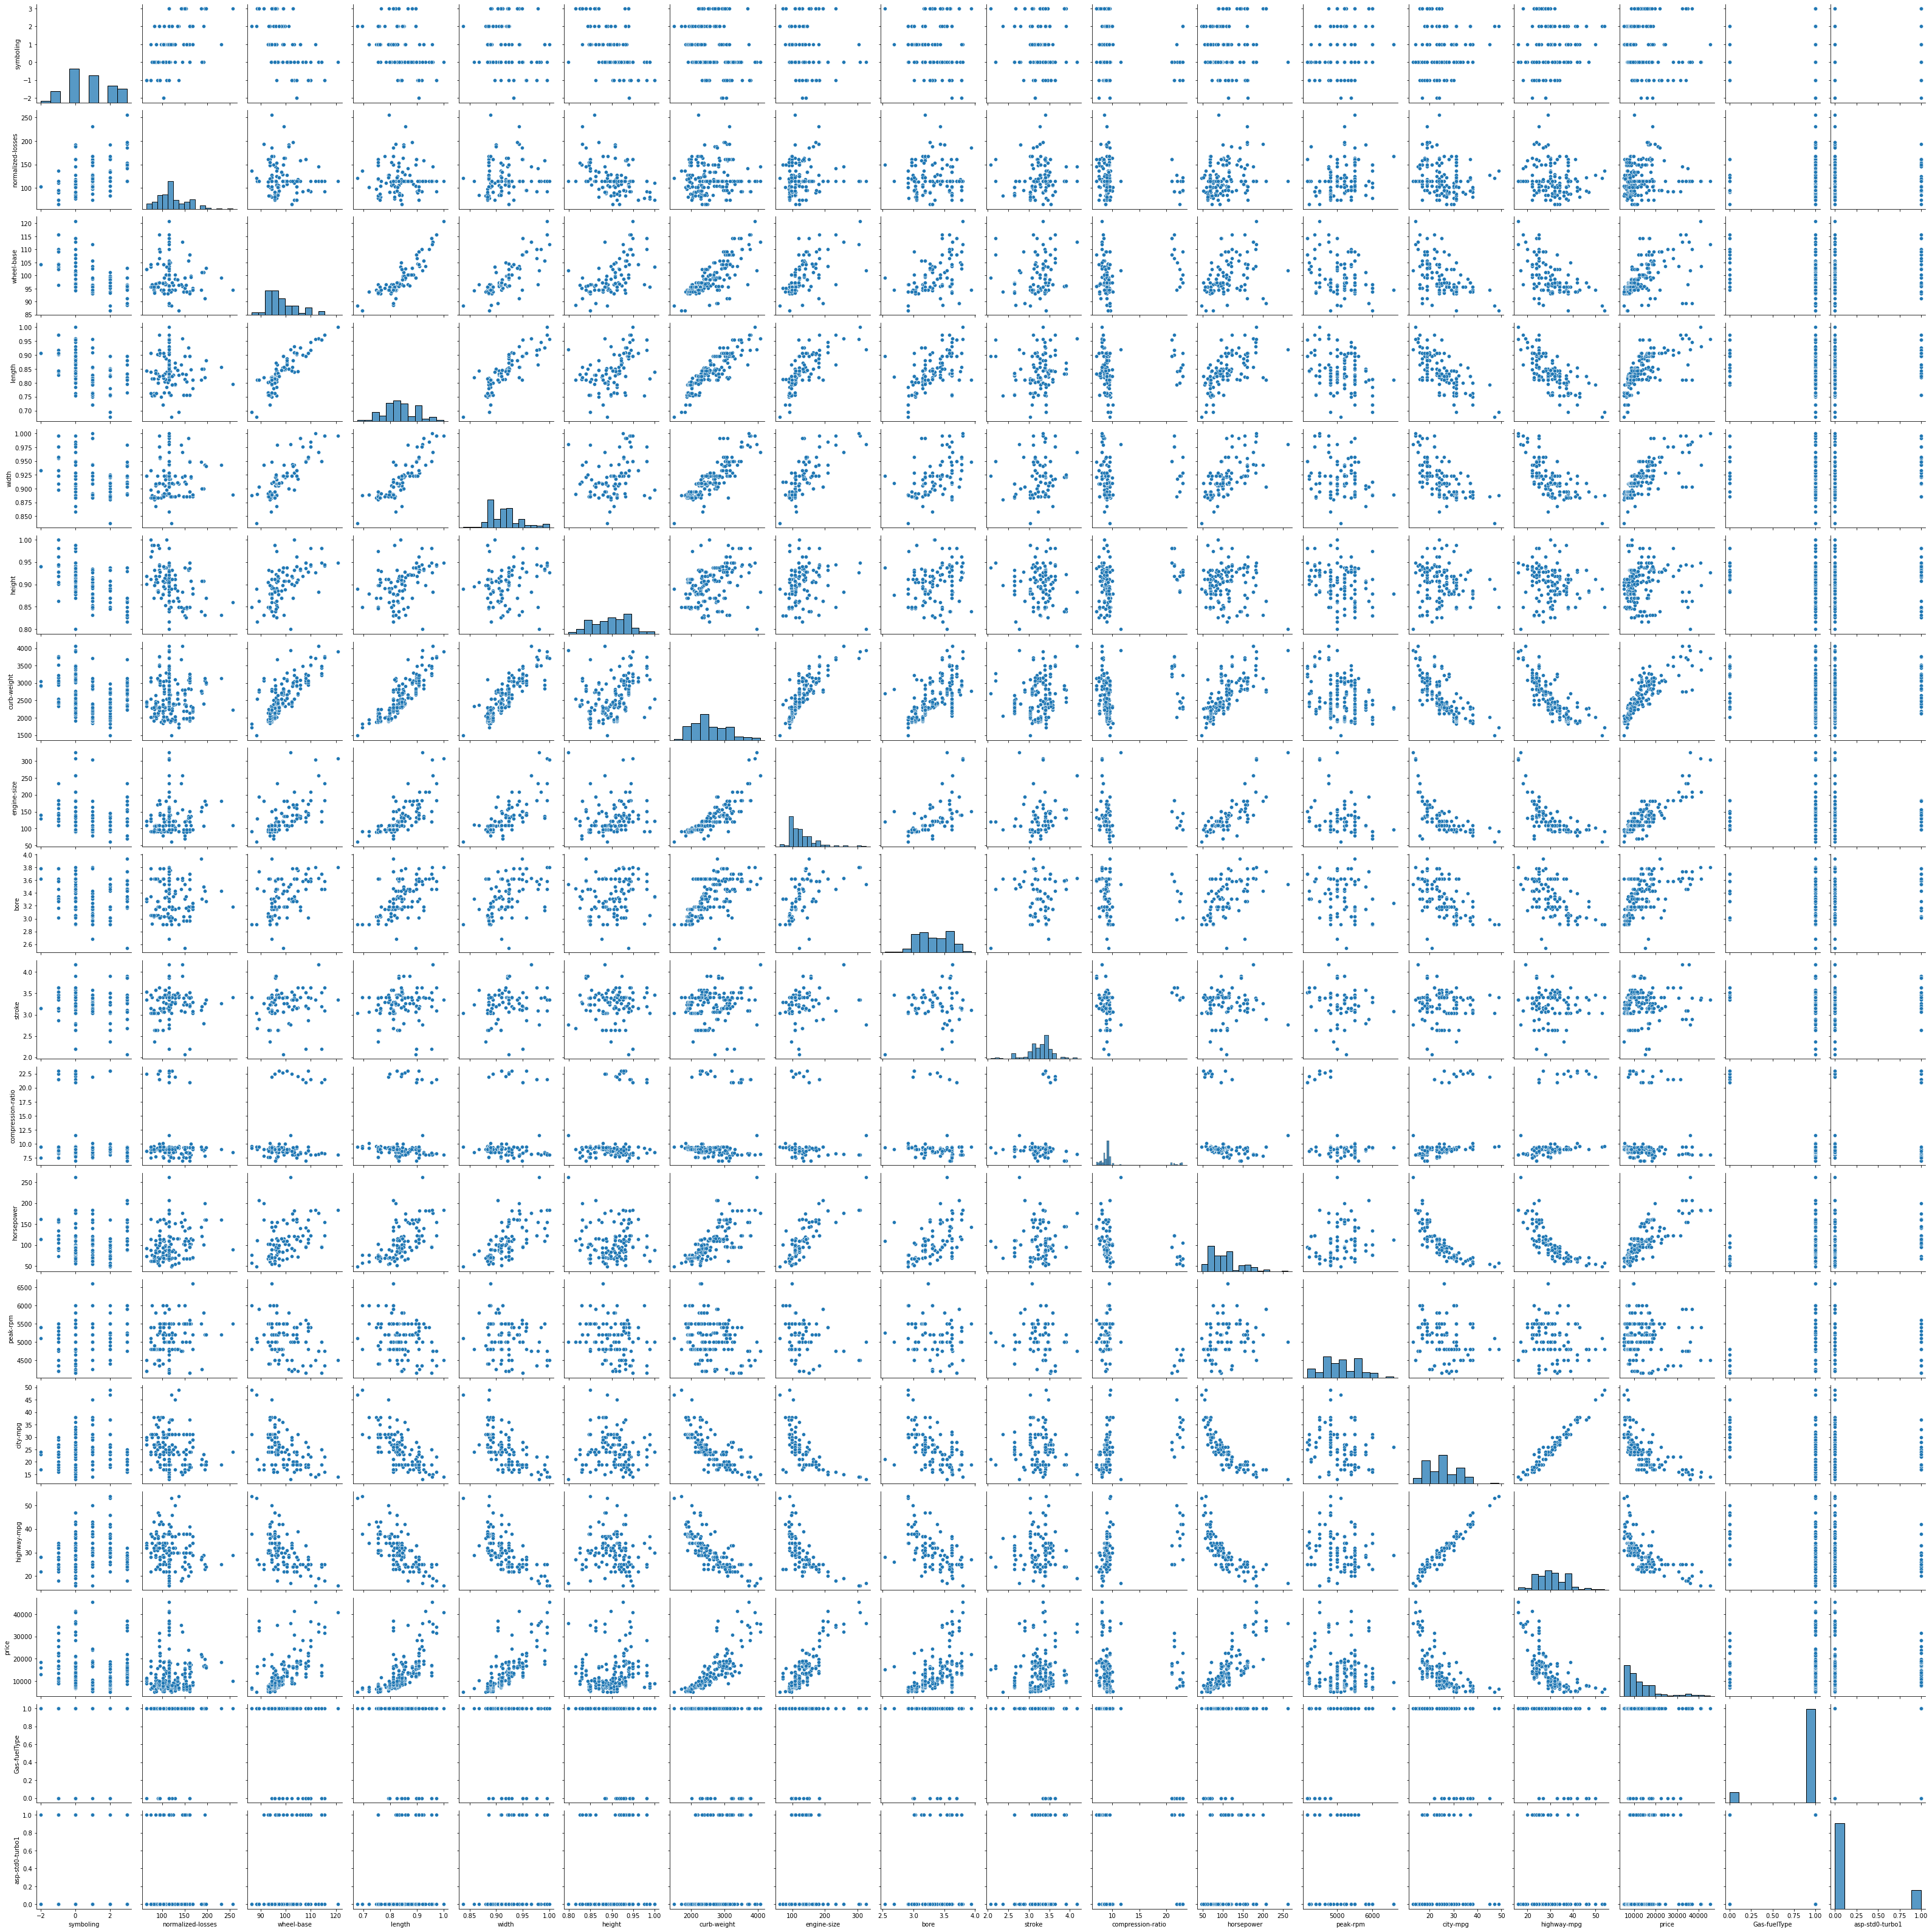

In [48]:
plt.figure(figsize=(20,20))
sns.pairplot(df)
plt.show()

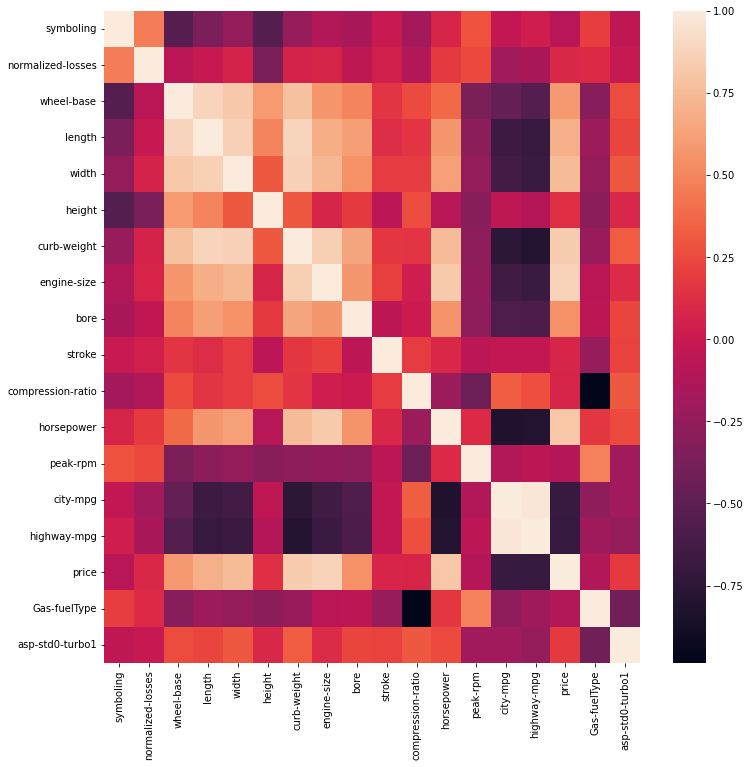

In [49]:
plt.figure(figsize=(12,12))
df_corr=df.corr()
sns.heatmap(df_corr)
plt.show()

In [50]:
df[["length",'width','curb-weight',"engine-size","horsepower","city-mpg","highway-mpg","wheel-base","price"]].corr()

,length,width,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,wheel-base,price
length,1.000000,0.857170,0.880665,0.685025,0.578683,-0.665192,-0.698142,0.876024,0.690628
width,0.857170,1.000000,0.866201,0.729436,0.614146,-0.633531,-0.680635,0.814507,0.751265
curb-weight,0.880665,0.866201,1.000000,0.849072,0.757961,-0.749543,-0.794889,0.782097,0.834415
engine-size,0.685025,0.729436,0.849072,1.000000,0.822167,-0.650546,-0.679571,0.572027,0.872335
horsepower,0.578683,0.614146,0.757961,0.822167,1.000000,-0.821171,-0.804490,0.372156,0.810500
city-mpg,-0.665192,-0.633531,-0.749543,-0.650546,-0.821171,1.000000,0.972044,-0.470606,-0.686571
highway-mpg,-0.698142,-0.680635,-0.794889,-0.679571,-0.804490,0.972044,1.000000,-0.543304,-0.704692
wheel-base,0.876024,0.814507,0.782097,0.572027,0.372156,-0.470606,-0.543304,1.000000,0.584642
price,0.690628,0.751265,0.834415,0.872335,0.810500,-0.686571,-0.704692,0.584642,1.000000


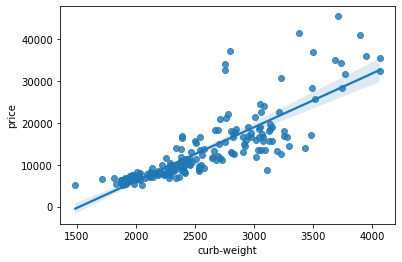

In [51]:
sns.regplot(x="curb-weight",y="price",data=df)
plt.show()

In [52]:
df[["curb-weight","price"]].corr()

,curb-weight,price
curb-weight,1.000000,0.834415
price,0.834415,1.000000


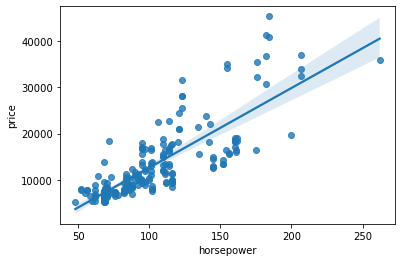

In [53]:
sns.regplot(x="horsepower",y="price",data=df)
plt.show()

In [54]:
df[["horsepower","price"]].corr()

,horsepower,price
horsepower,1.0000,0.8105
price,0.8105,1.0000


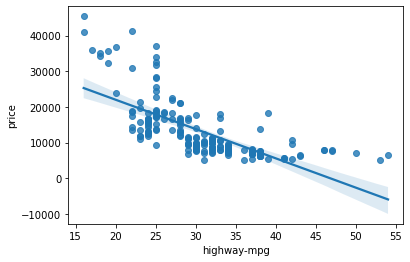

In [55]:
sns.regplot(x="highway-mpg",y="price",data=df)
plt.show()

In [56]:
df[["highway-mpg","price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


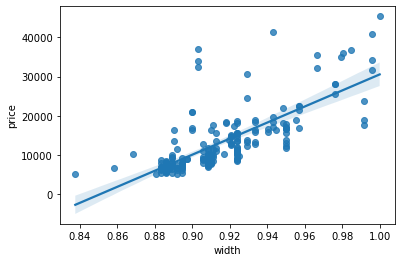

In [57]:
sns.regplot(x="width",y="price",data=df)
plt.show()

In [58]:
df[["width","price"]].corr()

,width,price
width,1.000000,0.751265
price,0.751265,1.000000


short list potential variables:
    "length",'width','curb-weight',"engine-size","horsepower","city-mpg","highway-mpg","wheel-base"

<AxesSubplot:xlabel='body-style', ylabel='price'>

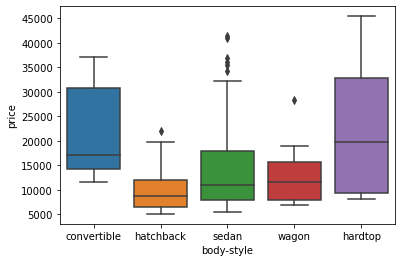

In [59]:
# Analysing Categorical Variables:
sns.boxplot(x="body-style", y="price", data=df)

Distribution of price between body style has a significant overlap, So not a good predictor

<AxesSubplot:xlabel='engine-location', ylabel='price'>

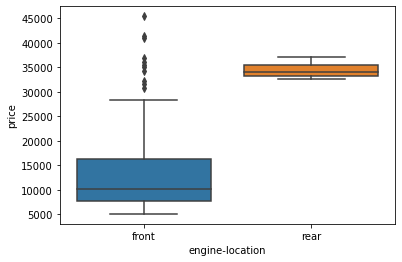

In [60]:
sns.boxplot(x="engine-location", y="price", data=df)

Engine Location looks like a good predictor

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

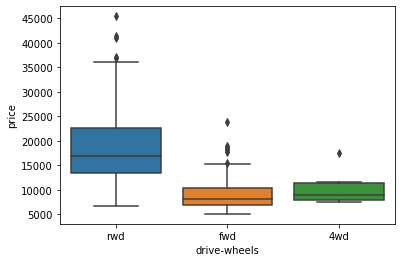

In [61]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

drive-wheels also looks like a good predictor

Continuous numerical variables:

Length
Width
Curb-weight
Engine-size
Horsepower
City-mpg
Highway-mpg
Wheel-base
Bore

Categorical variables:

Drive-wheels#

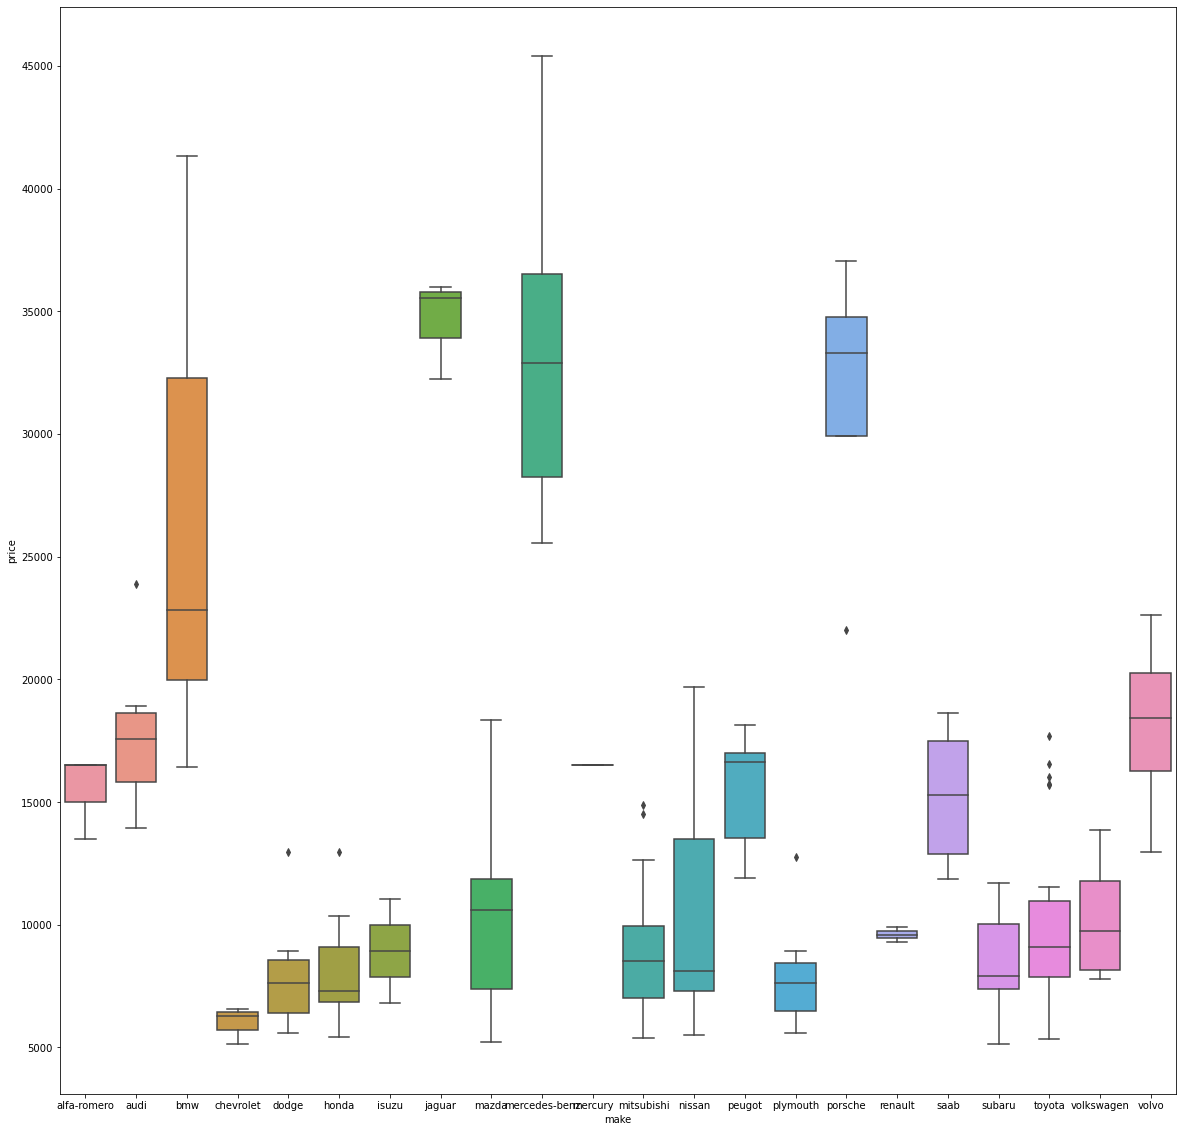

In [62]:
plt.figure(figsize=(20,20))
sns.boxplot(x="make",y="price",data=df)
plt.show()

<AxesSubplot:xlabel='fuel-type', ylabel='price'>

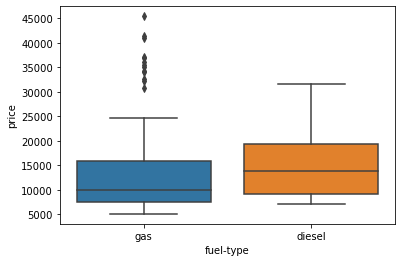

In [63]:
sns.boxplot(x="fuel-type",y="price",data=df)

By convention, when the

p-value is  <  0.001: we say there is strong evidence that the correlation is significant.

the p-value is  <  0.05: there is moderate evidence that the correlation is significant.

the p-value is  <  0.1: there is weak evidence that the correlation is significant.

the p-value is  >  0.1: there is no evidence that the correlation is significant.

In [64]:
#Correlation between "Length" and "price":

p_coef,p_value=stats.pearsonr(df["length"],df["price"])
print("p_coef= ",p_coef,"p_value= ",p_value )

if p_value <0.001:
    print("Significant correlation")
elif p_value <0.05:
    print("Moderate Correlation")
elif p_value<0.1:
    print("Weak Correlation")
else:
    print("No Correlation")
 




p_coef=  0.6906283804483642 p_value=  8.016477466158759e-30
Significant correlation


In [65]:
#Correlation between "width" and "price":

p_coef,p_value=stats.pearsonr(df["width"],df["price"])
print("p_coef= ",p_coef,"p_value= ",p_value )

if p_value <0.001:
    print("Significant correlation")
elif p_value <0.05:
    print("Moderate Correlation")
elif p_value<0.1:
    print("Weak Correlation")
else:
    print("No Correlation")
 


p_coef=  0.7512653440522673 p_value=  9.200335510481646e-38
Significant correlation


In [66]:
#Correlation between "curb-weight" and "price":

p_coef,p_value=stats.pearsonr(df["curb-weight"],df["price"])
print("p_coef= ",p_coef,"p_value= ",p_value )

if p_value <0.001:
    print("Significant correlation")
elif p_value <0.05:
    print("Moderate Correlation")
elif p_value<0.1:
    print("Weak Correlation")
else:
    print("No Correlation")
 


p_coef=  0.8344145257702846 p_value=  2.1895772388936914e-53
Significant correlation


In [67]:
#Correlation between "engine-size" and "price":

p_coef,p_value=stats.pearsonr(df["engine-size"],df["price"])
print("p_coef= ",p_coef,"p_value= ",p_value )

if p_value <0.001:
    print("Significant correlation")
elif p_value <0.05:
    print("Moderate Correlation")
elif p_value<0.1:
    print("Weak Correlation")
else:
    print("No Correlation")
 


p_coef=  0.8723351674455185 p_value=  9.265491622198389e-64
Significant correlation


In [68]:
#Correlation between "horsepower" and "price":

p_coef,p_value=stats.pearsonr(df["horsepower"],df["price"])
print("p_coef= ",p_coef,"p_value= ",p_value )

if p_value <0.001:
    print("Significant correlation")
elif p_value <0.05:
    print("Moderate Correlation")
elif p_value<0.1:
    print("Weak Correlation")
else:
    print("No Correlation")
 


p_coef=  0.8105000308467994 p_value=  4.122472382878645e-48
Significant correlation


In [69]:
#Correlation between "city-mpg" and "price":

p_coef,p_value=stats.pearsonr(df["city-mpg"],df["price"])
print("p_coef= ",p_coef,"p_value= ",p_value )

if p_value <0.001:
    print("Significant correlation")
elif p_value <0.05:
    print("Moderate Correlation")
elif p_value<0.1:
    print("Weak Correlation")
else:
    print("No Correlation")
 


p_coef=  -0.6865710067844677 p_value=  2.321132065567674e-29
Significant correlation


In [70]:
#Correlation between "highway-mpg" and "price":

p_coef,p_value=stats.pearsonr(df["highway-mpg"],df["price"])
print("p_coef= ",p_coef,"p_value= ",p_value )

if p_value <0.001:
    print("Significant correlation")
elif p_value <0.05:
    print("Moderate Correlation")
elif p_value<0.1:
    print("Weak Correlation")
else:
    print("No Correlation")
 

p_coef=  -0.7046922650589529 p_value=  1.7495471144477352e-31
Significant correlation


In [71]:
#Correlation between "wheel-base" and "price":

p_coef,p_value=stats.pearsonr(df["wheel-base"],df["price"])
print("p_coef= ",p_coef,"p_value= ",p_value )

if p_value <0.001:
    print("Significant correlation")
elif p_value <0.05:
    print("Moderate Correlation")
elif p_value<0.1:
    print("Weak Correlation")
else:
    print("No Correlation")
 

p_coef=  0.5846418222655081 p_value=  8.076488270732989e-20
Significant correlation


In [72]:
# ANOVA Test to check the dependency of Drive-Wheels on price

df["drive-wheels"].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [73]:
wheels_group=df[["drive-wheels","price"]]
df_groups=wheels_group.groupby(["drive-wheels"])
df_groups.head(5)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
6,fwd,17710.0
7,fwd,18920.0
8,fwd,23875.0
9,rwd,16430.0


In [74]:
df_groups.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [77]:
f_val, p_val = stats.f_oneway(df_groups.get_group('4wd')['price'], df_groups.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


Continuous numerical variables:

Length 

Width

Curb-weight

Engine-size

Horsepower

City-mpg

Highway-mpg

Wheel-base

Bore

Categorical variables:

Drive-wheels#

In [86]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

In [87]:
X=df[["horsepower"]]
y=df['price']

In [88]:
lm.fit(X,y)

LinearRegression()

In [89]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([14531.81178436, 14531.81178436, 21942.31680197, 12980.77585044,
       15221.16108832])

In [90]:
lm.intercept_

-4597.631400633978

In [91]:
lm.coef_

array([172.33732599])

In [93]:
error_train=y-Yhat
error_train

0     -1036.811784
1      1968.188216
2     -5442.316802
3       969.224150
4      2228.838912
          ...     
196    1796.176238
197   -3931.340758
198    2989.429718
199    8799.874846
200    7576.176238
Name: price, Length: 201, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Density'>

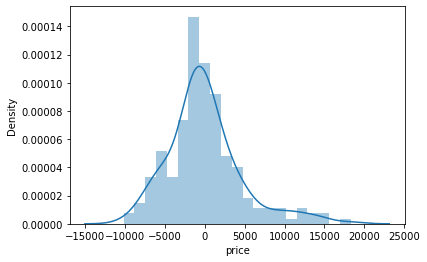

In [94]:
sns.distplot(error_train)

In [95]:
#Multiple Linear Regression
X=df[["length",'width','curb-weight',"engine-size","horsepower","city-mpg","highway-mpg","wheel-base"]]
Y=df["price"]


In [96]:
X.head()

,length,width,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,wheel-base
0,0.811148,0.890278,2548,130,111.0,21,27,88.6
1,0.811148,0.890278,2548,130,111.0,21,27,88.6
2,0.822681,0.909722,2823,152,154.0,19,26,94.5
3,0.848630,0.919444,2337,109,102.0,24,30,99.8
4,0.848630,0.922222,2824,136,115.0,18,22,99.4


In [97]:
Y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [98]:
#Split the dataset into train and test dataset
from  sklearn.model_selection import train_test_split

In [99]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [100]:
print(x_train)

       length     width  curb-weight  engine-size  horsepower  city-mpg  \
96   0.833253  0.905556         2324          120        97.0        27   
181  0.825084  0.909722         2212          109        85.0        27   
19   0.763095  0.883333         1909           90        70.0        38   
153  0.799135  0.894444         2109           98        70.0        30   
92   0.795771  0.886111         2028           97        69.0        31   
..        ...       ...          ...          ...         ...       ...   
67   0.973570  0.995833         3770          183       123.0        22   
192  0.907256  0.933333         2935          141       114.0        24   
117  0.755887  0.886111         1967           90        68.0        31   
47   0.764536  0.891667         1890           91        68.0        30   
172  0.843825  0.923611         2414          122        92.0        27   

     highway-mpg  wheel-base  
96            34        97.2  
181           34        97.3  
19    

In [101]:
print(y_test)

18      6295.0
170    10698.0
107    13860.0
98     13499.0
177    15750.0
        ...   
30      6855.0
160     8238.0
40     12945.0
56      8845.0
131    15510.0
Name: price, Length: 61, dtype: float64


In [102]:
#Train the model on the training set
from sklearn.linear_model import LinearRegression

In [103]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [104]:
#Predict the test set results

y_predict=lm.predict(x_test)
print(y_predict)

[ 5848.82253497 11689.79615428 21376.27892534 20192.3390636
 19923.31079413  9451.58046404 13441.33660898  6393.43911442
 16267.28499237  7015.32697243 11386.51265083 19040.88433189
  7525.56307184  8812.5948454  17118.91683574 17718.92037835
  6689.56074793 12951.00191878  9612.85698561  5934.8910599
  8772.80828755 12478.11234964 32689.51349507  7197.09643724
 10981.53838522 18851.54440342  9167.57057134  9157.97524276
 16336.39987218 32689.51349507 27355.72772473  9883.10283351
  7108.90412924 21612.95383592  7990.56714013 11561.79040801
 12899.36375647 15182.45015717 10630.14940221 17917.73140689
  6642.60376457 23689.05724522  8261.66749225 19290.6179809
 15879.49164036 13790.84882854 19288.28980013  6193.08187145
  5487.56190604 10402.11801041 35126.59873026 18851.54440342
 10150.00685717 10448.93299792  7006.87202892  5800.00980908
  4604.97363726  7347.70774397 10805.61536816 11214.38544313
 13170.46410859]


In [105]:
#rechecking with first row
y_predict1=lm.predict([[0.811148,0.890278,2548,130,111,21,27,88.6]])
y_predict1

array([10814.50401218])

In [106]:
#evaluate the model with r2 score

from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.7438594187709919

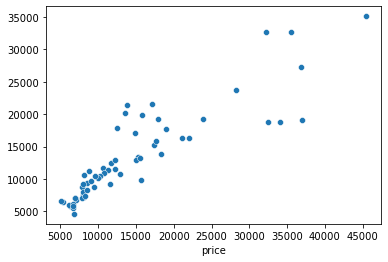

In [107]:
#Plot the results:
sns.scatterplot(x=y_test,y=y_predict)
plt.show()


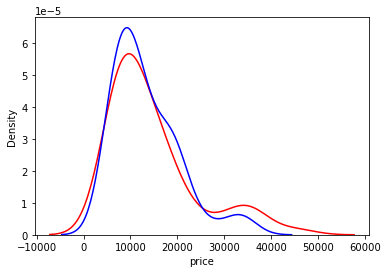

In [108]:
ax1=sns.distplot(y_test,hist=False,color='r',label="Actual Value")
sns.distplot(y_predict,hist=False,color='b',label="Predicted Value",ax=ax1)
plt.show()

Thus Concluding with Multiple Linear Regression we are able to predict the car value price with 75% accuracy 

In [109]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [110]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [111]:
rfr.score(x_test,y_test)

0.8932534259526835

In [112]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [127]:
#finding the Best Algorithm

models_param={
    'Ridge':{
        'model':Ridge(alpha=0.1),
        'params':{
            
        }
    },
    'Lasso':{
        'model':Lasso(alpha=0.1),
        'params':{
            
        }
    },
    'LinearRegression':{
        'model':LinearRegression(),
        'params':{
            
        }
    },
    'DecisionTreeRegressor':{
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion':['mse','mae']
        }
    },
    'RandomForestRegressor':{
        'model':RandomForestRegressor(),
        'params':{
            'criterion':['mse','mae']
        }
    },
    'ExtraTreesRegressor':{
        'model':ExtraTreesRegressor(),
        'params':{
            'n_estimators':[50,100],
            'criterion':['mse','mae']
        }
    },
    'KNeighborsRegressor':{
        'model':KNeighborsRegressor(),
        'params':{
            'n_neighbors':[1,5,10] 
        }
    },
    'GradientBoostingRegressor':{
        'model':GradientBoostingRegressor(),
        'params':{
            'n_estimators':[50,100]
        }
    }
}

In [134]:
scores=[]

for model_name,mp in models_param.items():
    gscv=GridSearchCV(mp['model'],mp['params'],cv=4,return_train_score=False)
    gscv.fit(x_train,y_train)
    scores.append({'model': model_name,
                  'best_Score':gscv.best_score_,
               'best_param':gscv.best_params_}
    )
df=pd.DataFrame(scores,columns=['model','best_Score','best_param'])
df
                

,model,best_Score,best_param
0,Ridge,0.791705,{}
1,Lasso,0.791153,{}
2,LinearRegression,0.791202,{}
3,DecisionTreeRegressor,0.849620,{'criterion': 'mse'}
4,RandomForestRegressor,0.905361,{'criterion': 'mse'}
5,ExtraTreesRegressor,0.917992,"{'criterion': 'mae', 'n_estimators': 50}"
6,KNeighborsRegressor,0.769154,{'n_neighbors': 5}
7,GradientBoostingRegressor,0.898266,{'n_estimators': 50}


In [135]:
# ExtraTreesRegressos  with best_score 0.917992 with parameters {'criterion': 'mae', 'n_estimators': 50}